###ResNet 
ResNet short for Residual Networks is a classic neural network used as a backbone for many computer vision tasks. This model was the winner of ImageNet challenge in 2015. The fundamental breakthrough with ResNet was it allowed us to train extremely deep neural networks with 150+layers successfully. Prior to ResNet training very deep neural networks was difficult due to the problem of vanishing gradients.

### Skip Connection — The Strength of ResNet
ResNet first introduced the concept of skip connection. The diagram below illustrates skip connection. The figure on the left is stacking convolution layers together one after the other. On the right we still stack convolution layers as before but we now also add the original input to the output of the convolution block. This is called skip connection

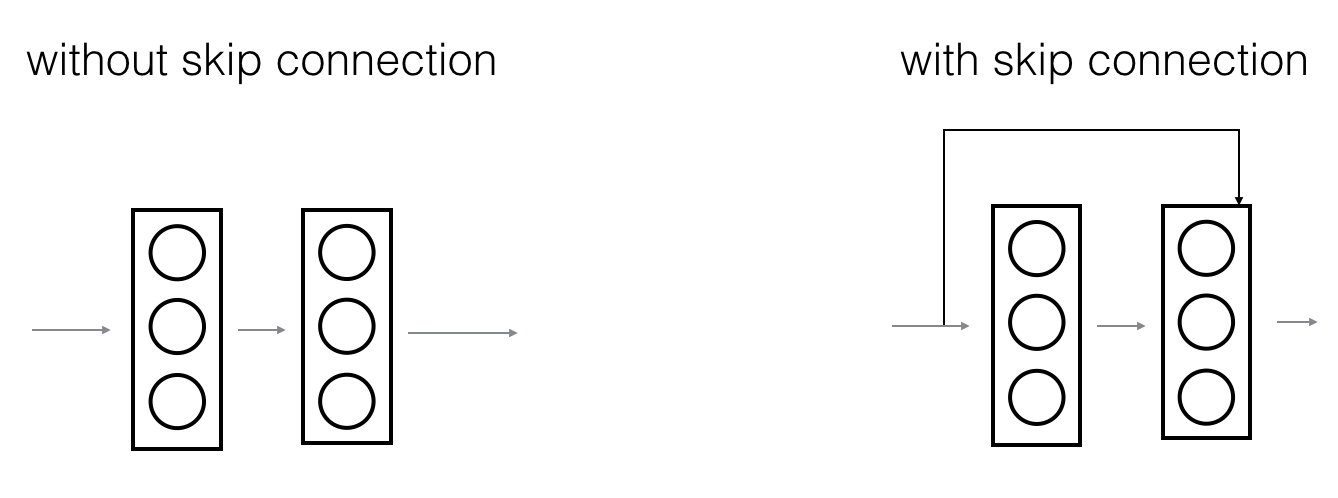

In [54]:
import cv2
img = cv2.imread('/content/skip_connection.png')
from google.colab.patches import cv2_imshow
cv2_imshow(img)

ktrain GitHub: https://github.com/amaiya/ktrain

Original Dataset Link: http://aicip.eecs.utk.edu/wiki/UTKFace

In [0]:
! git clone https://github.com/laxmimerit/Image-Dataset-for-Age-Prediction.git

Cloning into 'Image-Dataset-for-Age-Prediction'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 47107 (delta 0), reused 2 (delta 0), pack-reused 47104
Receiving objects: 100% (47107/47107), 1.37 GiB | 15.66 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (24110/24110), done.


In [0]:
! pip install ktrain

     |████████████████████████████████| 25.2MB 130kB/s 
     |████████████████████████████████| 421.8MB 40kB/s 
     |████████████████████████████████| 6.7MB 54.7MB/s 
     |████████████████████████████████| 983kB 53.3MB/s 
     |████████████████████████████████| 245kB 55.3MB/s 
     |████████████████████████████████| 665kB 51.4MB/s 
     |████████████████████████████████| 471kB 50.7MB/s 
     |████████████████████████████████| 450kB 45.4MB/s 
     |████████████████████████████████| 3.9MB 55.5MB/s 
     |████████████████████████████████| 890kB 53.8MB/s 
     |████████████████████████████████| 3.8MB 53.3MB/s 
     |████████████████████████████████| 1.1MB 21.2MB/s 
  Created wheel for ktrain: filename=ktrain-0.15.3-cp36-none-any.whl size=25243891 sha256=5c760a91b4f7a4a4e231c1b88e18785111bd0daa2fdb8269fa7154d31d65ce28
  Stored in directory: /root/.cache/pip/wheels/7e/d1/41/3bc5d4ed18a0820cb667d912b8d61f5af59ac7ab8d08ea8bb9
  Created wheel for keras-bert: filename=keras_bert-0.81.0-cp36-no

In [0]:
%matplotlib inline
import os
import ktrain
from ktrain import vision as vis

In [0]:
import re

pattern = r'([^/]+)_\d+_\d+_\d+.jpg$'

p =re.compile(pattern)
r =p.search('/content/12_1_0_20170103200659679.jpg')
print(r.group(1))

12


In [0]:
Data = "/content/Image-Dataset-for-Age-Prediction/images"

In [0]:
(train_data, test_data, preprocess )=vis.images_from_fname( Data, pattern=pattern,  is_regression=True, random_state=42)

/usr/local/lib/python3.6/dist-packages/ktrain/vision/data.py:744: UserWarning: Could not extract target for /content/Image-Dataset-for-Age-Prediction/images/39_1_20170116174525125.jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/usr/local/lib/python3.6/dist-packages/ktrain/vision/data.py:744: UserWarning: Could not extract target for /content/Image-Dataset-for-Age-Prediction/images/61_1_20170109142408075.jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/usr/local/lib/python3.6/dist-packages/ktrain/vision/data.py:744: UserWarning: Could not extract target for /content/Image-Dataset-for-Age-Prediction/images/53__0_20170116184028385.jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/usr/local/lib/python3.6/dist-packages/ktrain/vision/data.py:744: UserWarning: Could not extract target for /content/Image-Dataset-for-

Found 21669 validated image filenames.
Found 2432 validated image filenames.


In [0]:
vis.print_image_regression_models()

pretrained_resnet50: 50-layer Residual Network (pretrained on ImageNet)
resnet50: 50-layer Resididual Network (randomly initialized)
pretrained_mobilenet: MobileNet Neural Network (pretrained on ImageNet)
mobilenet: MobileNet Neural Network (randomly initialized)
pretrained_inception: Inception Version 3  (pretrained on ImageNet)
inception: Inception Version 3 (randomly initialized)
wrn22: 22-layer Wide Residual Network (randomly initialized)
default_cnn: a default LeNet-like Convolutional Neural Network


In [0]:
model =vis.image_regression_model('pretrained_resnet50', train_data=train_data, val_data=test_data)

The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? True
94773248/94765736 [==============================] - 7s 0us/step
pretrained_resnet50 model created.


In [0]:
learner = ktrain.get_learner(model=model, train_data=train_data, val_data=test_data, batch_size=64)

In [0]:
# learnRate =0.0001

In [0]:
learner.fit_onecycle(0.0001, 2)



begin training using onecycle policy with max lr of 0.0001...
Train for 339 steps, validate for 76 steps
Epoch 1/2
339/339 [==============================] - 354s 1s/step - loss: 366.8462 - mae: 14.3787 - val_loss: 216.0566 - val_mae: 11.1080
Epoch 2/2
339/339 [==============================] - 318s 937ms/step - loss: 167.2666 - mae: 9.9246 - val_loss: 201.0105 - val_mae: 10.7102


In [0]:
learner.freeze(15)

learner.fit_onecycle(0.0001, 2)



begin training using onecycle policy with max lr of 0.0001...
Train for 339 steps, validate for 76 steps
Epoch 1/2
339/339 [==============================] - 345s 1s/step - loss: 108.5920 - mae: 7.8110 - val_loss: 337.6422 - val_mae: 14.0992
Epoch 2/2
339/339 [==============================] - 338s 996ms/step - loss: 42.0546 - mae: 4.9004 - val_loss: 86.7334 - val_mae: 6.4997


In [0]:
predictor = ktrain.get_predictor(learner.model, preprocess)

In [0]:
test_data.filenames[10:20]

['28_0_0_20170117202401886.jpg',
 '31_0_3_20170119200050628.jpg',
 '1_0_3_20161220220411577.jpg',
 '69_1_0_20170110175853077.jpg',
 '2_1_2_20161219141042280.jpg',
 '26_1_4_20170103224755416.jpg',
 '27_1_0_20170117150925811.jpg',
 '23_1_3_20170104222844871.jpg',
 '26_0_1_20170113135559835.jpg',
 '16_1_4_20170103234142187.jpg']

In [0]:
def show_prediction(fname):
  fname = Data + '/' + fname
  pred = round(predictor.predict_filename(fname)[0])
  actual = int(p.search(fname).group(1))
  vis.show_image(fname)
  print("predicted age: %s | actual age: %s" %(pred, actual))

predicted age: 31.0 | actual age: 31


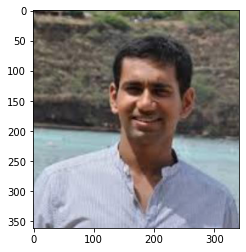

In [0]:
show_prediction('31_0_3_20170119200050628.jpg')

predicted age: 23.0 | actual age: 26


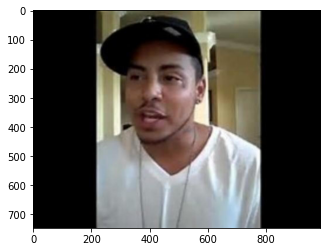

In [0]:
show_prediction('26_0_1_20170113135559835.jpg')

predicted age: 22.0 | actual age: 16


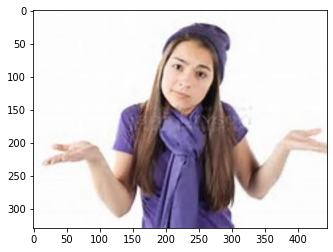

In [0]:
show_prediction('16_1_4_20170103234142187.jpg')

### Open Webcam and Capture your Image: (google-colab)

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [0]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

### Try different Image other than Dataset

In [0]:
def real_prediction(fname):
  pred = round(predictor.predict_filename(fname)[0])
  vis.show_image(fname)
  print("predicted age: %s " %(pred))

predicted age: 44.0 


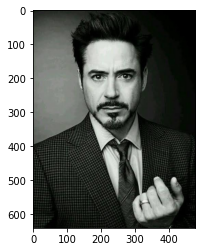

In [0]:
real_prediction('/content/RDJ.jpeg') 

### Save the model

In [0]:
predictor.save("/content/age_predictor")

In [0]:
! zip -r /content/age_predictor.zip /content/age_predictor

  adding: content/age_predictor/ (stored 0%)
  adding: content/age_predictor/tf_model.h5 (deflated 9%)
  adding: content/age_predictor/tf_model.preproc (deflated 41%)
